# Segmentation - clustering dataset for marketing campaign

In [2]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Mean-shift clustering

### Eperiment 1 - employ mean-shift clustering to cluster mall customers

Goal: Provided a dataset of mall-customers, segment the dataset for a marketing campaign.

In [ ]:
import pandas as pd
import numpy as np

In [5]:
# load sales data
root  = '/content/drive/MyDrive/Interview/UPS/data'
mall_df = pd.read_csv(f'{root}/Mall_Customers.csv')
display(mall_df.shape, mall_df.head())

(200, 5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
# preprocessing
mall_df.info()
mall_df.describe()
print(mall_df.isnull().sum())
print(mall_df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


In [151]:
mall_df_standard = mall_df.copy(deep = True)
mall_df_standard.rename(columns = {'Age':'age','Gender':'gender','Annual Income (k$)':'income', 'Spending Score (1-100)':'spending_score'}, inplace = True)
standardize_col = ['age','income', 'spending_score']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
mall_df_standard[standardize_col] = scaler.fit_transform(mall_df_standard[standardize_col])
display(mall_df_standard.head(), mall_df_standard.describe())


,CustomerID,gender,age,income,spending_score
0,1,Male,-1.424569,-1.738999,-0.434801
1,2,Male,-1.281035,-1.738999,1.195704
2,3,Female,-1.352802,-1.700830,-1.715913
3,4,Female,-1.137502,-1.700830,1.040418
4,5,Female,-0.563369,-1.662660,-0.395980


,CustomerID,age,income,spending_score
count,200.000000,2.000000e+02,2.000000e+02,2.000000e+02
mean,100.500000,-1.021405e-16,-2.131628e-16,-1.465494e-16
std,57.879185,1.002509e+00,1.002509e+00,1.002509e+00
min,1.000000,-1.496335e+00,-1.738999e+00,-1.910021e+00
25%,50.750000,-7.248436e-01,-7.275093e-01,-5.997931e-01
50%,100.500000,-2.045351e-01,3.587926e-02,-7.764312e-03
75%,150.250000,7.284319e-01,6.656748e-01,8.851316e-01
max,200.000000,2.235532e+00,2.917671e+00,1.894492e+00


In [15]:
# mean-shift clustering
import sklearn
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.preprocessing import StandardScaler

In [152]:
Config = {
    'bandwidth': 1.2,
    'cluster_all': True,
    'bin_seeding': True,
    'n_jobs': -1,
}

In [153]:
MS_cluster = MeanShift(**Config)
MS_cluster.fit(mall_df_standard[standardize_col])
mall_df_standard['cluster'] = MS_cluster.predict(mall_df_standard[standardize_col])
display(mall_df_standard.head())

,CustomerID,gender,age,income,spending_score,cluster
0,1,Male,-1.424569,-1.738999,-0.434801,1
1,2,Male,-1.281035,-1.738999,1.195704,1
2,3,Female,-1.352802,-1.700830,-1.715913,1
3,4,Female,-1.137502,-1.700830,1.040418,1
4,5,Female,-0.563369,-1.662660,-0.395980,1


In [154]:
mall_df_standard.cluster.value_counts()

cluster
1    69
0    58
2    39
3    34
Name: count, dtype: int64

In [20]:
# visualization
import matplotlib.pyplot as plt

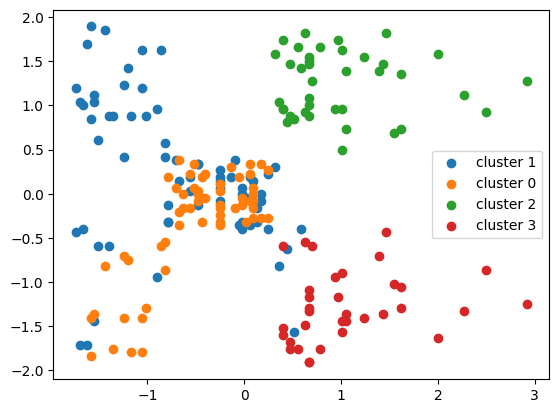

In [155]:
for cluster in mall_df_standard.cluster.unique():
    temp_df = mall_df_standard[mall_df_standard.cluster == cluster]
    plt.scatter(temp_df.income, temp_df.spending_score, label = f'cluster {cluster}')
plt.legend()

__Estimate required bandwith__

In [156]:
bandwidth = estimate_bandwidth(mall_df_standard[standardize_col], quantile=1)
bandwidth

4.372112089144284

In [157]:
bandwidths = {}
for q in [0.1, 0.25, 0.5, 0.75, 1]:

  bandwidth = estimate_bandwidth(mall_df_standard[standardize_col], quantile=q)
  bandwidths[q] = bandwidth
print('Quantile: Bandwidth\n',bandwidths)

Quantile: Bandwidth
 {0.1: 1.0149139013232393, 0.25: 1.6843261544287773, 0.5: 2.276337414917011, 0.75: 2.86766640061041, 1: 4.372112089144284}


In [166]:
# update badwidth to 1.5

Config = {
    'bandwidth': 1.3,
    'cluster_all': True,
    'bin_seeding': True,
    'n_jobs': -1,
}

In [167]:
MS_cluster = MeanShift(**Config)
MS_cluster.fit(mall_df_standard[standardize_col])
mall_df_standard['cluster'] = MS_cluster.predict(mall_df_standard[standardize_col])
mall_df_standard.cluster.value_counts()

cluster
0    84
1    74
2    42
Name: count, dtype: int64

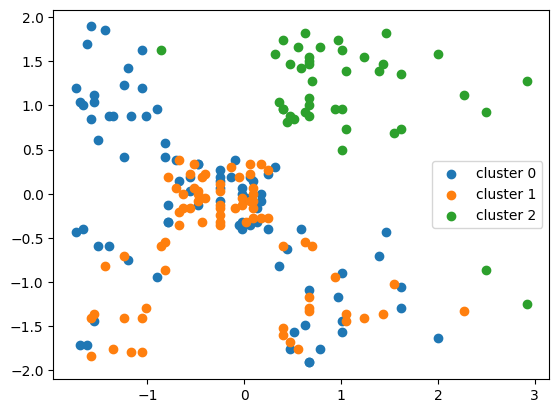

In [168]:
for cluster in mall_df_standard.cluster.unique():
    temp_df = mall_df_standard[mall_df_standard.cluster == cluster]
    plt.scatter(temp_df.income, temp_df.spending_score, label = f'cluster {cluster}')
plt.legend()

__Drawback of mean-shift cluster__

- While it is robut to outlier, it does not work well with high dim feature.
- computationaly expensive

#### Evalute with silhouette score

In [169]:
from sklearn.metrics import silhouette_score

silhouette_score(mall_df_standard[cluster_cols], mall_df_standard['cluster'])


0.3251172177317573

In [170]:
# compute silhotte score for different bandwidth
cluster_cols = ['age', 'income', 'spending_score']
bandwidths = [1., 1.1, 1.2]


for bandwidth in bandwidths:
  Config = {
    'bandwidth': bandwidth,
    'cluster_all': True,
    'bin_seeding': True,
    'n_jobs': -1,
  }
  MS_cluster = MeanShift(**Config)
  MS_cluster.fit(mall_df_standard[cluster_cols])
  mall_df_standard[f"cluster_{bandwidth}"] = MS_cluster.labels_  # Use MS_cluster.labels_ to get cluster labels

mall_df_standard.head()


,CustomerID,gender,age,income,spending_score,cluster,cluster_1.0,cluster_1.1,cluster_1.2
0,1,Male,-1.424569,-1.738999,-0.434801,0,7,4,1
1,2,Male,-1.281035,-1.738999,1.195704,0,4,4,1
2,3,Female,-1.352802,-1.700830,-1.715913,0,7,1,1
3,4,Female,-1.137502,-1.700830,1.040418,0,4,4,1
4,5,Female,-0.563369,-1.662660,-0.395980,0,5,4,1


In [176]:
s_scores

[]

Text(0, 0.5, 'silhouette score')

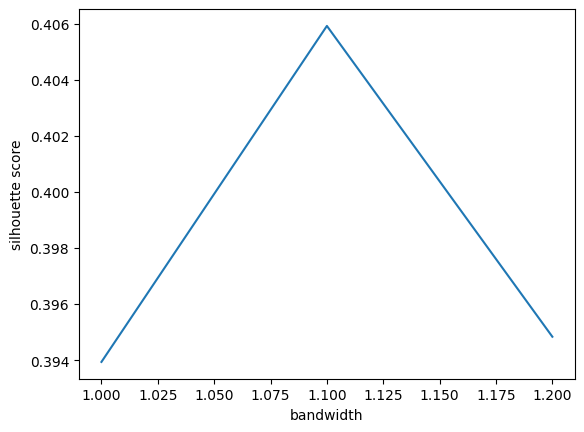

In [178]:
s_scores = []
bandwidths = [1., 1.1, 1.2]
for col in mall_df_standard.columns[-3:]:
  s_scores.append(silhouette_score(mall_df_standard[cluster_cols], mall_df_standard[col]))


plt.plot(bandwidths, s_scores)
plt.xlabel('bandwidth')
plt.ylabel('silhouette score')

__Bandwidth of 1.1 has the highest silhouette score__

### Perform the clustering with train/test split to avoid overfitting

## k-mode and k-prototype clustering

### __K-prototype clustering for mix of numerical and categorical features__

__Experiment: cluster bank customers for marketing campaign__

- categorical feature: `Education`
- numerical feature: `income`

In [101]:
from kmodes.kprototypes import KPrototypes

In [104]:
bank_df = pd.read_csv(f'{root}/Bank_Personal_Loan_Modelling-2.csv')
display(bank_df.head())

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,Primary,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,Primary,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,Primary,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,Secondary,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,Secondary,0,0,0,0,0,1


In [105]:
bank_df.info()
bank_df.describe()
print(bank_df.isnull().sum())
print(bank_df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   object 
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 547.0+ KB
ID                    0
Age                 

In [110]:
# standardize income
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bank_df_standard = bank_df[['Income','Education']].copy(deep = True)
bank_df_standard['Income'] = scaler.fit_transform(bank_df_standard['Income'].values.reshape(-1,1))
display(bank_df_standard.head())

,Income,Education
0,-0.538229,Primary
1,-0.864109,Primary
2,-1.363793,Primary
3,0.569765,Secondary
4,-0.625130,Secondary


In [113]:
kprot_cluster = KPrototypes(n_clusters = 3, n_jobs = -1, random_state=42)
bank_df_standard['cluster'] = kprot_cluster.fit_predict(bank_df_standard, categorical = [1])
display(bank_df_standard.head())

,Income,Education,cluster
0,-0.538229,Primary,1
1,-0.864109,Primary,0
2,-1.363793,Primary,0
3,0.569765,Secondary,1
4,-0.625130,Secondary,0


<Axes: xlabel='cluster', ylabel='count'>

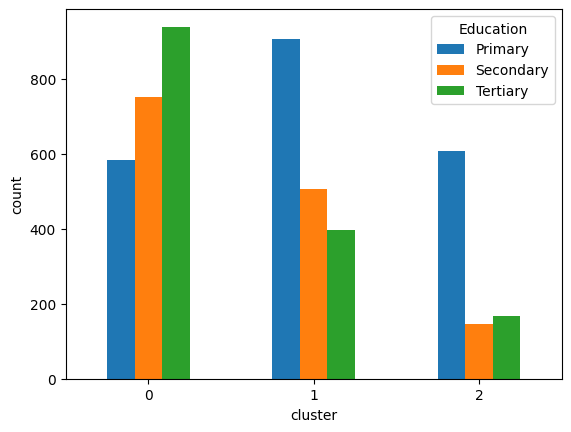

In [118]:
(bank_df_standard
 .groupby('cluster')
 .Education
 .value_counts()
 .unstack()).plot(kind = 'bar', rot = 0, ylabel='count')

### Evaluate cluster with silhouette score

### K-mode for clustering categorical feature

__Experiment: __

In [ ]:
from kmodes.kmodes import KModes
